# Model of GDP Prediction through the Rail transportation information

## Introduction
Forecasting economic growth quickly has become increasingly crucial in today's world. This study seeks to anticipate economic growth by analyzing the rail transportation system. Utilizing data from the World Bank spanning various years and countries, this research aims to provide insights into economic trends.

## Problem statement
1-Find relationship beween rail transportaion and GDP\
2-Analyze relation between greenhouse emissions and GDP\
3-Find the most important countries in transportation system and greenhouse emissions \
3-Introduction model of GDP Prediction by using rail transportation and greenhouse emissions information

## Method
In our approach, we employ machine learning techniques to select the optimal algorithm from a pool of available options. Our methodology hinges on evaluating performance using **$R^2$** and RMSE criteria. To facilitate this process, we construct a machine learning pipeline, requiring the creation of a Python class comprising various functions.


### Data Collection

I utilized the World Bank Group(wbg)https://github.com/tgherzog/wbgapi library, a pivotal resource aggregating data from diverse nations. This repository stands as a cornerstone in data collection, encompassing a wide array of information spanning economic, social, cultural, environmental, and geographic domains.

| Feature            | Description                                           |
|--------------------|-------------------------------------------------------|
| IS.AIR.PSGR        | Air transport, passengers carried                     |
| IS.RRS.GOOD.MT.K6 | Railways, goods transported (million ton-km)          |
| IS.RRS.PASG.KM    | Railways, passengers carried (million passenger-km)   |
| AG.LND.TOTL.K2    | Land area (sq. km)                                    |
| NY.GDP.MKTP.KD    | GDP (constant usd)                                     |
| EN.ATM.GHGT.KT.CE   | Total greenhouse gas emissions (kt of CO2 equivalent)                                   |
| time               | Year                                                  |
| economy            | Economy/Country                                       |

## Reference
wbgapi. (n.d.). Wbgapi offers a thorough platform for accessing both the data and metadata APIs of the World Bank. Retrieved from https://github.com/tgherzog/wbgapi


## 1-reading data from the source
The required data can be accessed in two ways:

1-Directly from the data source of World Bank\
2-Through my repository on GitHub\
If you want to directly read the data from the World Bank, you need to install the library **wbgapi**.

In [ ]:
#directly from the data source of World Bank
#pip install wbgapi
import wbgapi as wb
data=wb.data.DataFrame(
['IS.RRS.GOOD.MT.K6','IS.RRS.PASG.KM','IS.RRS.TOTL.KM','AG.LND.TOTL.K2','NY.GDP.MKTP.KD','EN.ATM.GHGT.KT.CE'], time=range(2000, 2022), skipBlanks=True, columns='series')
data=data.reset_index(level=0)
data=data.reset_index(level=0)

In [3]:
# Through my repository on GitHub
import pandas as pd
address_web = "https://raw.githubusercontent.com/AZFARHAD24511/datasets/main/wbg_data.csv"
data = pd.read_csv(address_web,index_col=0)

### 2-cheking the data about missing values

In [5]:
data.isnull().sum()

economy                 0
time                    0
AG.LND.TOTL.K2         51
EN.ATM.GHGT.KT.CE     783
IS.RRS.GOOD.MT.K6    3737
IS.RRS.PASG.KM       3734
IS.RRS.TOTL.KM       4146
NY.GDP.MKTP.KD        258
dtype: int64

### 3- removeing missing values
Due to the fact that all the countries of the world did not produce the desired data during the desired years, or did not have such facilities (for example, the rail transportation system) in those years, it is expected that we will face a lot of missing data. Therefore, it does not seem logical to impute missing data. Because it is possible that the country in question may not have a rail transportation system in the year in question. That's why I decided to delete the missing data.
However, as can be seen, **1348 observations** from countries are available, which seems to be sufficient.

In [6]:
data_dna=data.dropna()
print(data_dna.shape)

(1348, 8)


### 4- doing some calculation on features
Since the area of different countries is different and in order to make the indicators comparable, I divided the indicators of each country into its own area. Now GDP, the number of passengers transported, the amount of cargo transported, the length of the railway and the amount of greenhouse gases produced per square kilometer have been obtained.

In [7]:
import pandas as pd
data_dna1=pd.DataFrame()
data_dna1['gdppkm2']=data_dna['NY.GDP.MKTP.KD']/data_dna['AG.LND.TOTL.K2']
data_dna1['railpkm2']=data_dna['IS.RRS.TOTL.KM']/data_dna['AG.LND.TOTL.K2']
data_dna1['passpkm2']=data_dna['IS.RRS.PASG.KM']/data_dna['AG.LND.TOTL.K2']
data_dna1['goodspkm2']=data_dna['IS.RRS.GOOD.MT.K6']/data_dna['AG.LND.TOTL.K2']
data_dna1['co2pkm2']=data_dna['EN.ATM.GHGT.KT.CE']/data_dna['AG.LND.TOTL.K2']
data_dna1['time']=data_dna['time']
data_dna1['economy']=data_dna['economy']
data_dna1

,gdppkm2,railpkm2,passpkm2,goodspkm2,co2pkm2,time,economy
110,2.210664e+05,0.016058,0.004562,0.001022,0.297955,YR2000,ALB
111,2.394001e+05,0.016314,0.005036,0.000693,0.296454,YR2001,ALB
112,2.502606e+05,0.016314,0.004489,0.000766,0.319688,YR2002,ALB
113,2.640966e+05,0.016314,0.003832,0.001168,0.334574,YR2003,ALB
114,2.786606e+05,0.016314,0.003248,0.001168,0.337455,YR2004,ALB
...,...,...,...,...,...,...,...
5632,1.033638e+06,0.010079,0.004837,0.011993,1.501387,YR2020,VNM
5775,3.070615e+04,0.001679,0.000006,0.000400,0.046736,YR2017,ZMB
5798,5.690882e+04,0.008065,0.000253,0.002787,0.075932,YR2018,ZWE
5799,5.330510e+04,0.008065,0.000533,0.002319,0.074182,YR2019,ZWE


### 5-Standardization of features
Considering that the numbers of different countries are different in different features, one of the ways to convert numbers in a fixed range is to standardize it, which is written as follows. The good thing about this is that the features can be compared regardless of their nature.

$st=\frac{X-min(x)}{max(x)-min(x)}$

In [8]:
def MinMaxScl(df):
    dff=pd.DataFrame()
    for j in df.columns:
        if pd.api.types.is_numeric_dtype(df[j]):
            mx=df[j].max()
            mn=df[j].min()
            dff[j]=(df[j]-mn)/(mx-mn)
            dff.index=df.index
        else:
            dff[j]=df[j]
    return dff
MinMaxScl(data_dna1)

,gdppkm2,railpkm2,passpkm2,goodspkm2,co2pkm2,time,economy
110,0.008456,0.127260,0.004207,0.002251,0.039456,YR2000,ALB
111,0.009166,0.129342,0.004645,0.001527,0.039251,YR2001,ALB
112,0.009586,0.129342,0.004140,0.001688,0.042426,YR2002,ALB
113,0.010121,0.129342,0.003533,0.002574,0.044460,YR2003,ALB
114,0.010684,0.129342,0.002995,0.002574,0.044854,YR2004,ALB
...,...,...,...,...,...,...,...
5632,0.039890,0.078520,0.004460,0.026464,0.203924,YR2020,VNM
5775,0.001092,0.010051,0.000003,0.000878,0.005123,YR2017,ZMB
5798,0.002106,0.062107,0.000232,0.006146,0.009113,YR2018,ZWE
5799,0.001967,0.062107,0.000489,0.005113,0.008874,YR2019,ZWE


### 6 Feature explorations
#### 6-1 Average of indexes by countries
Here, the goal is to calculate the average of all countries  regarding the desired **indicators**.

In [9]:
dfn=MinMaxScl(data_dna1)
dfm = dfn.drop(columns=['time']).groupby(['economy']).mean()
dfm.head()

,gdppkm2,railpkm2,passpkm2,goodspkm2,co2pkm2
economy,,,,,
ALB,0.011164,0.125564,0.002884,0.002775,0.042589
ARG,0.007584,0.040076,0.002520,0.008119,0.016666
ARM,0.010538,0.213183,0.001391,0.039768,0.035450
AUT,0.170153,0.523395,0.116321,0.526189,0.133212
AZE,0.017892,0.204261,0.007473,0.194429,0.076650


#### 6-2 The 5 highest countries

In [10]:
dic={'gdppkm2': 'GDP per square kilometers',
    'railpkm2': 'lenght of rail square kilometers',
'passpkm2': 'Number of passengers per square kilometers',
'goodspkm2':'Tones of goods transported by rail system per square kilometers',
'co2pkm2': 'Tones of greenhouse emissions per square kilometers'}
def top5(df):
    for j in df.columns:
        top = df.nlargest(5, j).index.tolist()
        print(f"The 5 highest countries in the case of {dic[j]} are: {top}")
top5(dfm)

The 5 highest countries in the case of GDP per square kilometers are: ['NLD', 'LUX', 'CHE', 'BEL', 'KOR']
The 5 highest countries in the case of lenght of rail square kilometers are: ['CZE', 'BEL', 'LUX', 'DEU', 'CHE']
The 5 highest countries in the case of Number of passengers per square kilometers are: ['JPN', 'KOR', 'NLD', 'CHE', 'BEL']
The 5 highest countries in the case of Tones of goods transported by rail system per square kilometers are: ['UKR', 'DEU', 'CHE', 'LVA', 'USA']
The 5 highest countries in the case of Tones of greenhouse emissions per square kilometers are: ['KOR', 'NLD', 'LUX', 'BEL', 'ISR']


The results above presents the top five countries for five different features:

**gdppkm2**: GDP per square kilometers\
**railpkm2**: lenght of rail square kilometers \
**passpkm2**: Number of passengers per square kilometers\
**goodspkm2**:Tones of goods transported by rail system per square kilometers\
**co2pkm2**: Tones of greenhouse emissions  per square kilometers\

For the feature gdppkm2, the Netherlands (NLD) holds the highest position, followed by Luxembourg (LUX), Switzerland (CHE), Belgium (BEL), and South Korea (KOR).

Regarding railpkm2, the Czech Republic (CZE) is ranked first, followed by Belgium (BEL), Luxembourg (LUX), Germany (DEU), and Switzerland (CHE).

For passpkm2, Japan (JPN) secures the top position, trailed by South Korea (KOR), the Netherlands (NLD), Switzerland (CHE), and Belgium (BEL).

The highest values for goodspkm2 are observed in Ukraine (UKR), Germany (DEU), Switzerland (CHE), Latvia (LVA), and the United States of America (USA).

Lastly, in terms of co2pkm2, South Korea (KOR) leads the rankings, followed by the Netherlands (NLD), Luxembourg (LUX), Belgium (BEL), and Israel (ISR).

These findings provide insights into the countries with the highest values for each respective feature, highlighting notable performers across different aspects of transportation and environmental impact.

#### 6-3 The position of countries by heatmap

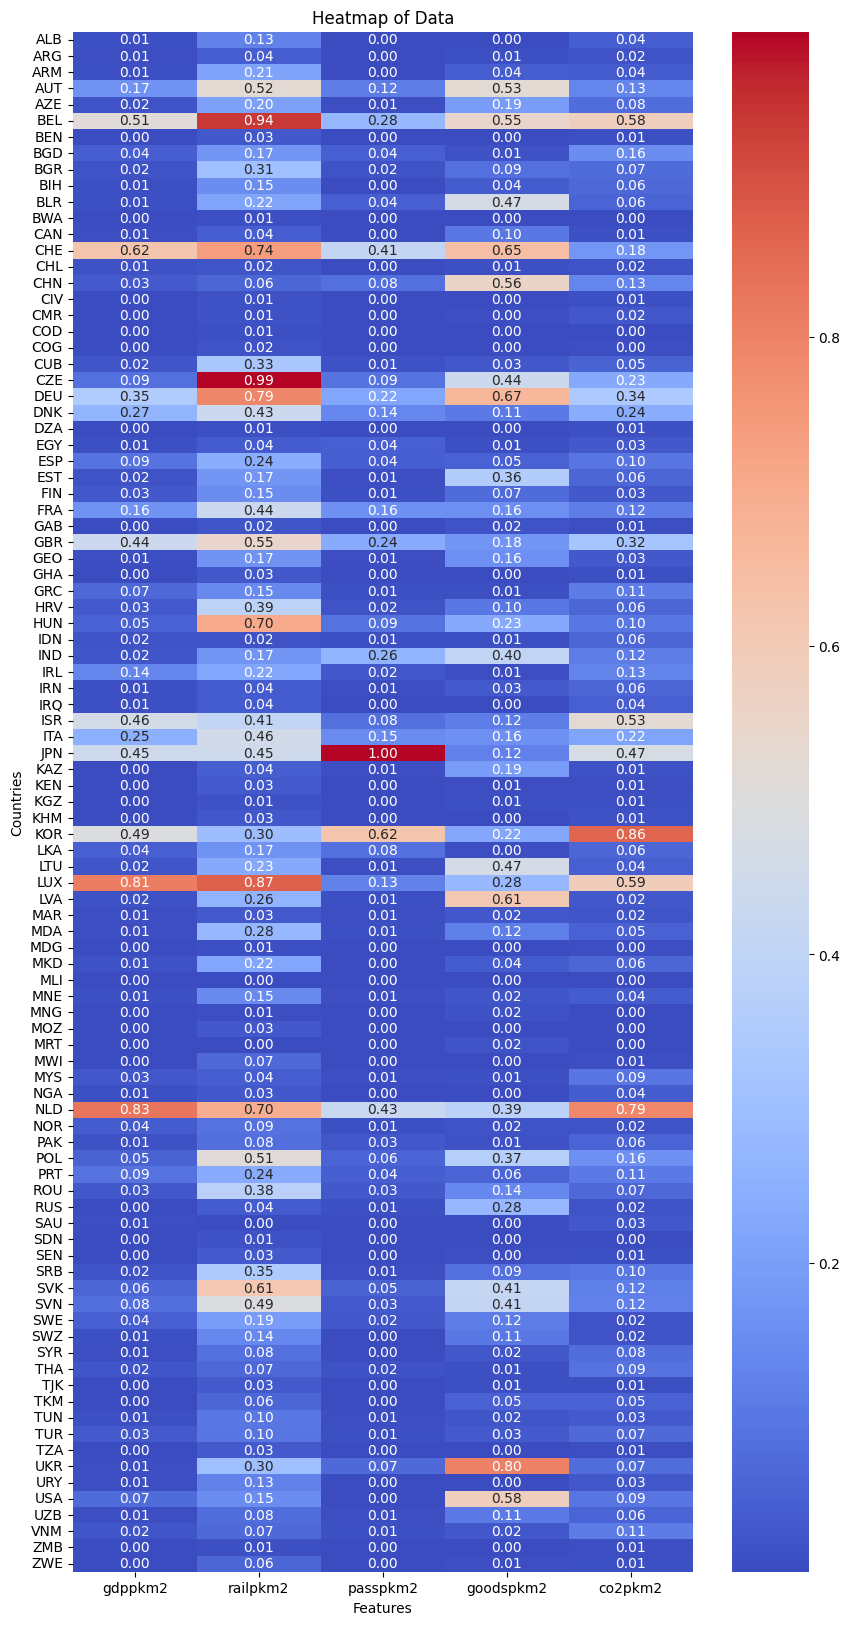

In [17]:
from matplotlib import pyplot as pl
import seaborn as sn
dfm = dfn.drop(columns=['time']).groupby(['economy']).mean()
dfm.head()
pl.figure(figsize=(10, 20))
sn.heatmap(dfm, annot=True, cmap='coolwarm', fmt=".2f")
pl.title('Heatmap of Data')
pl.xlabel('Features')
pl.ylabel('Countries')
pl.show()

#### 6-4-Finding relation between features by scatter graph

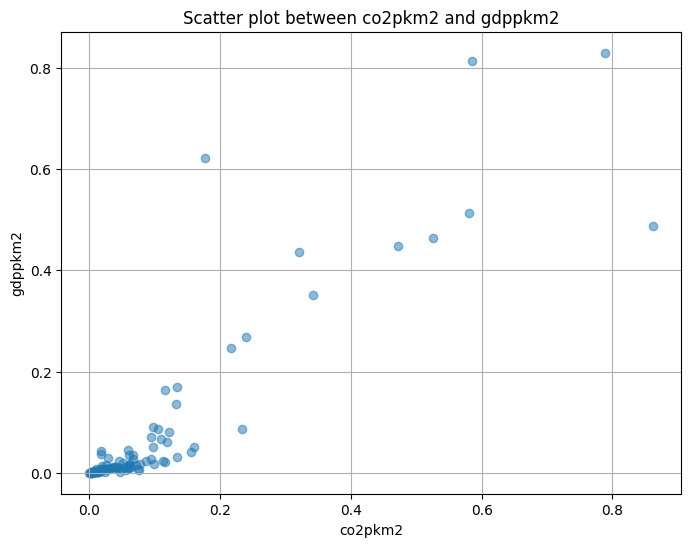

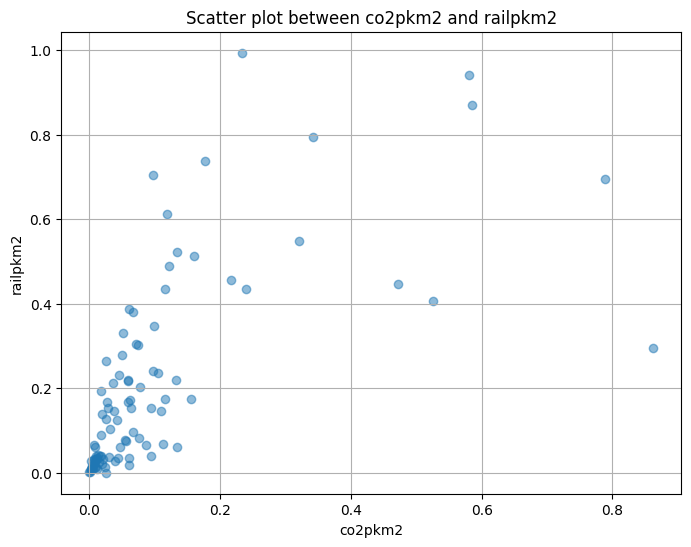

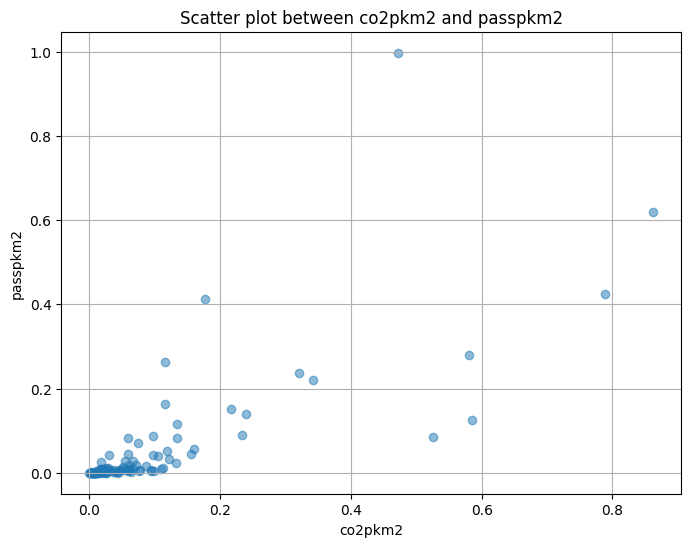

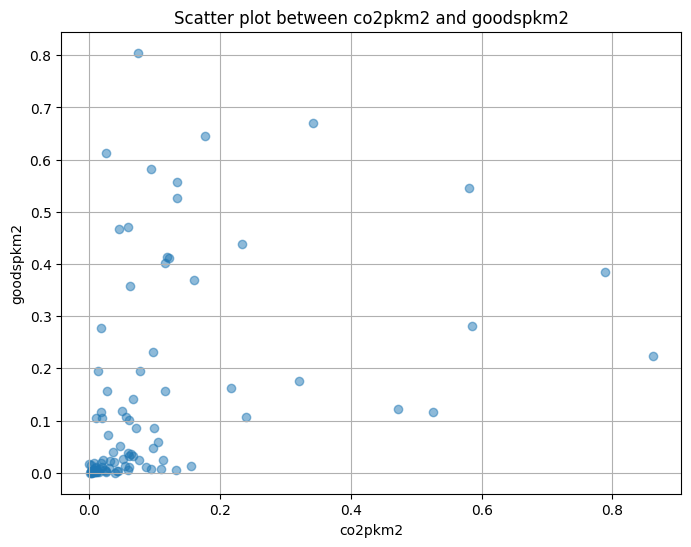

In [12]:
# Define the feature to be compared with others
feature_to_compare = 'co2pkm2'
for feature in dfm.columns:
    if feature != feature_to_compare: 
        pl.figure(figsize=(8, 6))
        pl.scatter(dfm[feature_to_compare], dfm[feature], alpha=0.5)
        pl.title(f'Scatter plot between {feature_to_compare} and {feature}')
        pl.xlabel(feature_to_compare)
        pl.ylabel(feature)
        pl.grid(True)
        pl.show()


#### 6-5- Calculation of correlation between features
Above, we drew the graph of the relationship between the variables, but we did not understand their degree of correlation. To find the degree of correlation, we use the correlation function.\
As we know, the correlation formula between two variables $X$ and $Y$ is as follows.where $\bar X$ and $\bar Y$ are the averages of X and Y.

$\rho_{XY} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$

The correlations show how strongly related GDP per square kilometer is to other factors. For example, the correlation between gdppkm2 and railpkm2 is 0.781220736858462, indicating a moderately strong positive relationship between GDP per square kilometer and the long of rail way per square kilometer. Similarly, the correlations between gdppkm2 and passpkm2 (passenger per square kilometer), goodspkm2 (freight per square kilometer), and co2pkm2 (CO2 emissions per square kilometer) are 0.5883940237969711, 0.7546143757897805, and 0.3405107258754096 respectively.

In [14]:
import numpy as np

def Correlation(df, base_feature):
    for j in df.columns:
        feature1 = df[base_feature]
        feature2 = df[j]
        mean_feature1 = np.mean(feature1)
        mean_feature2 = np.mean(feature2)
        diff1 = feature1 - mean_feature1
        diff2 = feature2 - mean_feature2
        numerator = np.sum(diff1 * diff2)
        denominator = np.sqrt(np.sum(diff1 ** 2) * np.sum(diff2 ** 2))
        corr_coefficient = numerator / denominator
        prt=print(f' correlation between gdppkm2 and {j} is {corr_coefficient}')
    return prt
base_feature ='gdppkm2'
Correlation(dfm, base_feature)


 correlation between gdppkm2 and gdppkm2 is 1.0
 correlation between gdppkm2 and railpkm2 is 0.781220736858462
 correlation between gdppkm2 and passpkm2 is 0.5883940237969711
 correlation between gdppkm2 and goodspkm2 is 0.7546143757897805
 correlation between gdppkm2 and co2pkm2 is 0.3405107258754096


#### 6-6-Finding trend of features during the years by line graph

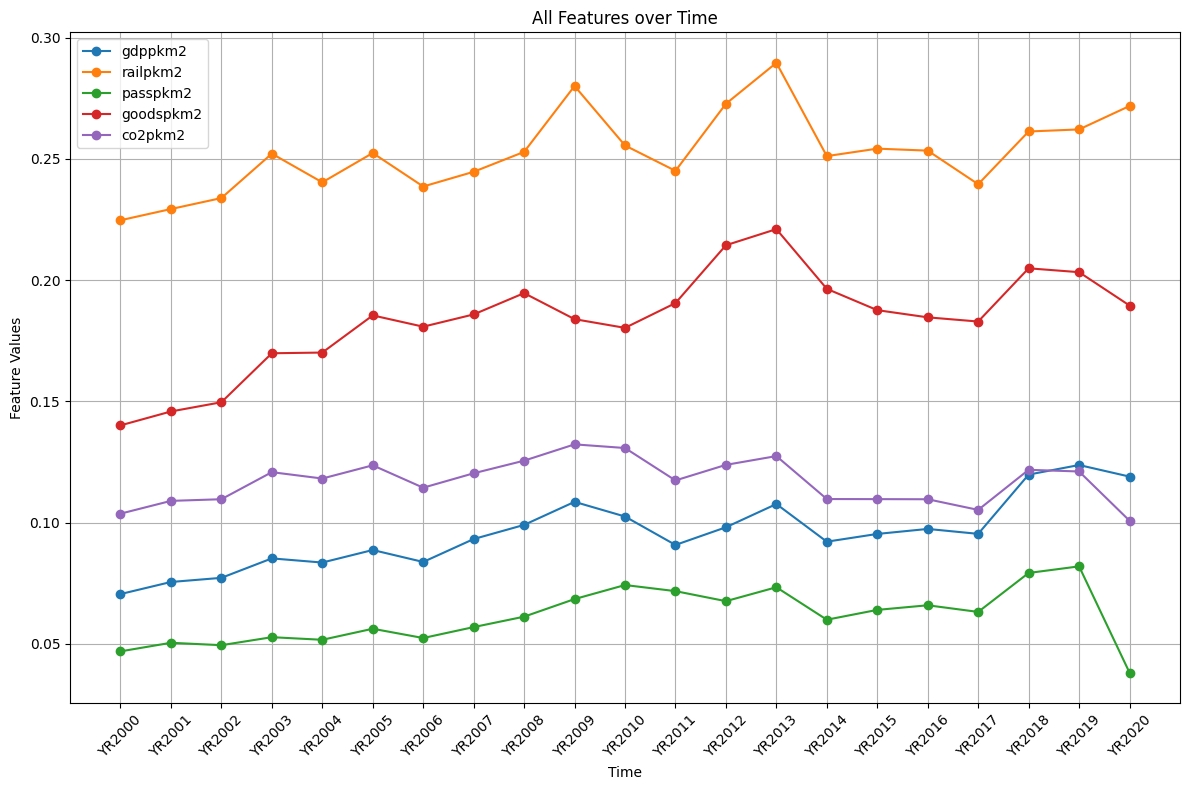

In [13]:
dfm = dfn.drop(columns=['economy']).groupby(['time']).mean()
dfm.head()

pl.figure(figsize=(12, 8))
for feature in dfm.columns:
    pl.plot(dfm.index, dfm[feature], marker='o', label=feature)

pl.title('All Features over Time')
pl.xlabel('Time')
pl.ylabel('Feature Values')
pl.xticks(rotation=45)
pl.legend()
pl.grid(True)
pl.tight_layout()
pl.show()

### 7-Implementation of machine learning by defining python calss
In this stage I do some task as follow:\
Importing the necessary libraries.\
Selecting multiple algorithms for the machine learning process, specifically focusing on the regression class.\
Defining a function to display the information of the utilized data.\
Creating a function to convert all integer data into float format.\
Developing a function to encode all object variables lie **time** and **economy**\
Establishing a function to split the data into test and train sets.\
Crafting a function to compute the data using the specified algorithms and calculating $R^2$ and and Root Mean Squared Error (RMSE).\
Defining a function to compare algorithms based on the outcomes of the previous function and presenting the results in tabular format.\
All these procedures are encapsulated within a Python class, ensuring automated execution of the calculations.\

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan  19 11:31:47 2024

@author: Admin
"""

import pandas as pd
import time
from sklearn import preprocessing, linear_model, tree, svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
drops = ['gdppkm2']
target = ['gdppkm2']
#Full Pipeline
class DataPipeline:
    def __init__(self):
        self.scaler = preprocessing.StandardScaler(with_mean=False)
        self.models = {
            "lr": linear_model.LinearRegression(),
            "SVR": svm.SVR(),
            "Ridge": linear_model.Ridge(),
            "Lasso": linear_model.Lasso(),
            "ElasticNet": ElasticNet(),
            "dt": tree.DecisionTreeRegressor(),
            "rf": RandomForestRegressor(),
            "gbr": GradientBoostingRegressor(),
            "knr": KNeighborsRegressor(),
            "abr": AdaBoostRegressor(),
            "XGBRegressor": XGBRegressor(),
            "ExtraTreesRegressor": ExtraTreesRegressor()
        }
        pd.set_option('display.float_format', lambda x: '%.6f' % x)

    def data_info(self, data: pd.DataFrame) -> pd.DataFrame:
        print(f"Data information in brief:\n {data.info()} \n {'#'*50} Data statistical description: \n {data.describe()}\n {'#'*50} The number of missing values :\n  {data.isnull().sum() } \n ")
        return data

    def convert_int_to_float(self, data: pd.DataFrame) -> pd.DataFrame:
        int_columns = data.select_dtypes(include=['int']).columns
        data[int_columns] = data[int_columns].astype(float)
        return data

    def standardize_data(self, data: pd.DataFrame) -> pd.DataFrame:
        numeric_columns = data.select_dtypes(include=['float']).columns
        self.scaler.fit(data[numeric_columns])
        data[numeric_columns] = self.scaler.transform(data[numeric_columns])
        return data

    def encoding(self, data: pd.DataFrame) -> pd.DataFrame:
        label_encoders = {}
        object_columns = data.select_dtypes(include=['object']).columns
        for col in object_columns:
            label_encoders[col] = LabelEncoder()
            data[col] = label_encoders[col].fit_transform(data[col])
        return data
    
    def impute_missing_values(self, data: pd.DataFrame) -> pd.DataFrame:
            for col in data.columns:
                if data[col].dtype == 'object':
                    data[col] = data[col].fillna(data[col].mode()[0])
                elif data[col].dtype == 'float':
                    data[col] = data[col].fillna(data[col].mean())
            return data

    def split(self, data: pd.DataFrame) -> tuple:
        df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
        x_train = df_train.drop(drops, axis=1)
        y_train = df_train[target].values.ravel()
        x_test = df_test.drop(target, axis=1)
        y_test = df_test[target].values.ravel()
        
        return x_train, y_train, x_test, y_test

    def fit_model(self, data: pd.DataFrame, model_name: str) -> float:
        x_train, y_train, x_test, y_test = self.split(data)
        x_test = x_test[x_train.columns]
        model = self.models[model_name]
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        R2S = r2_score(y_test, y_predict)
        mse = mean_squared_error(y_test, y_predict)
        
        return R2S, mse

    def compare_models(self, data: pd.DataFrame) -> pd.DataFrame:
        results = {}
        for model_name, model in self.models.items():
            st = time.time()  
            R2S, mse = self.fit_model(data, model_name)
            et = time.time()    
            time_taken = et - st  
            results[model_name] = {'R2': R2S, 'RMSE': mse ** 0.5, 'Time': time_taken}
            print(f"{model_name}: {time_taken} seconds")  
        return pd.DataFrame(results).T.sort_values(by=['R2', 'RMSE','Time'],ascending=False)

    def process(self, data: pd.DataFrame) -> pd.DataFrame:
        return (
            data.pipe(self.data_info)
            .pipe(self.convert_int_to_float)
            .pipe(self.impute_missing_values)
            .pipe(self.standardize_data)
            .pipe(self.encoding)
            .pipe(self.compare_models)
        )

# Run and Results
pipeline = DataPipeline()
result = pipeline.process(data_dna1)
result


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gdppkm2    1348 non-null   float64
 1   railpkm2   1348 non-null   float64
 2   passpkm2   1348 non-null   float64
 3   goodspkm2  1348 non-null   float64
 4   co2pkm2    1348 non-null   float64
 5   time       1348 non-null   float64
 6   economy    1348 non-null   float64
dtypes: float64(7)
memory usage: 73.8 KB
Data information in brief:
 None 
 ################################################## Data statistical description: 
           gdppkm2    railpkm2    passpkm2   goodspkm2     co2pkm2        time  \
count 1348.000000 1348.000000 1348.000000 1348.000000 1348.000000 1348.000000   
mean     0.520682    1.044502    0.508853    0.841019    0.711070    1.546037   
std      1.000371    1.000371    1.000371    1.000371    1.000371    1.000371   
min      0.000526    0.014903    0.000018    0.0000

,R2,RMSE,Time
ExtraTreesRegressor,0.995903,0.056914,0.428633
knr,0.993539,0.071475,0.011004
rf,0.987373,0.099923,0.899046
SVR,0.984886,0.109321,0.073590
gbr,0.981655,0.120441,0.374814
XGBRegressor,0.973981,0.143436,0.111031
dt,0.962566,0.172045,0.027953
abr,0.945346,0.207884,0.113260
Ridge,0.775405,0.421415,0.010999
lr,0.775351,0.421466,0.006004


### 8-Results and conclusion
The table presents various machine learning models and their performance metrics in investigating the relationship between rail transport and GDP. Each row corresponds to a different algorithm, while the columns display the model's R-squared (R2) value, root mean squared error (RMSE), and time taken for computation.\
From the results, it's evident that the **ExtraTreesRegressor** algorithm stands out as the most effective in this context, achieving a high **$R^2$** value of 0.995903 and a low RMSE of 0.056914, while also being computationally efficient with a time of 0.428633. This indicates that the model built with this algorithm can accurately predict changes in GDP based on transportation and environmental data.

The **$R^2$** value of 0.995903 suggests that approximately 99% of the variability in GDP can be explained by the transportation and environmental factors considered in the model. This level of explanatory power is remarkably high and implies a strong relationship between rail transport and GDP.

Comparing this predictive model to growth forecasts based on transportation data alone underscores its utility and reliability. By incorporating environmental data, which can be easily obtained, this model provides a comprehensive understanding of the factors influencing GDP fluctuations.

| Model              | R2       | RMSE     | Time     |
|--------------------|----------|----------|----------|
| **ExtraTreesRegressor**| **0.995903** | **0.056914** | **0.428633** |
| knr                | 0.993539 | 0.071475 | 0.011004 |
| rf                 | 0.987373 | 0.099923 | 0.899046 |
| SVR                | 0.984886 | 0.109321 | 0.073590 |
| gbr                | 0.981655 | 0.120441 | 0.374814 |
| XGBRegressor       | 0.973981 | 0.143436 | 0.111031 |
| dt                 | 0.962566 | 0.172045 | 0.027953 |
| abr                | 0.945346 | 0.207884 | 0.113260 |
| Ridge              | 0.775405 | 0.421415 | 0.010999 |
| lr                 | 0.775351 | 0.421466 | 0.006004 |
| ElasticNet         | 0.400315 | 0.688607 | 0.009028 |
| Lasso              | -0.005693| 0.891749 | 0.008026 |


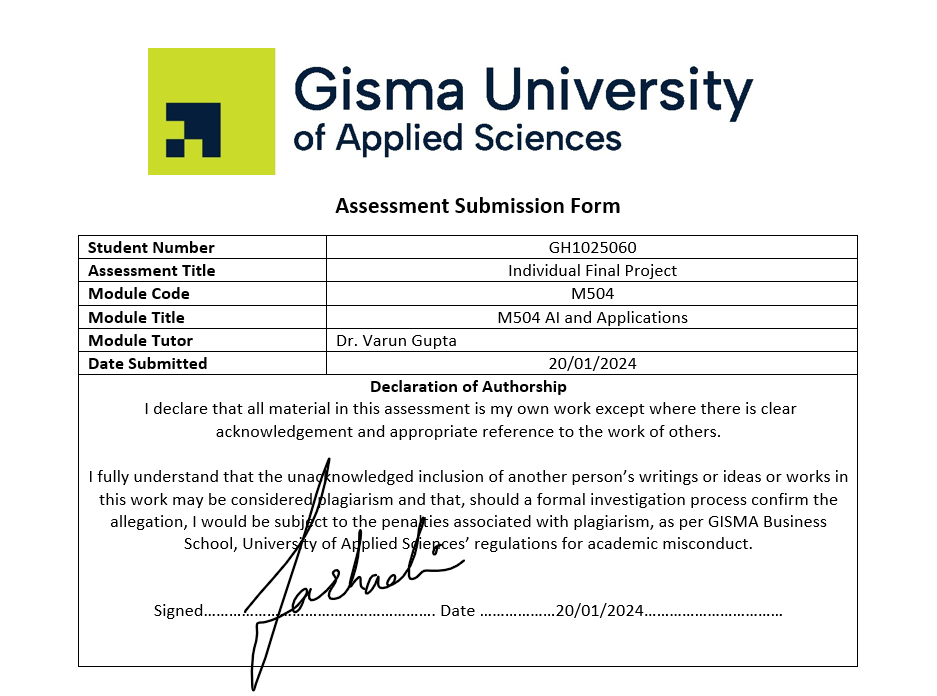